In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

In [5]:
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
dt_clf.score(X,y)

0.9733333333333334

In [8]:
def split(X,y,d,value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a],X[index_b],y[index_a],y[index_b]

In [19]:
from collections import Counter

In [59]:
def entropy(y):
    counter = Counter(y)
    H = 0
    s = len(y)
    if s == 0:
        return 0
    for val in counter.values():
        p = val*1./s
        if p == 0 or p == 1:
            continue
        H += -p*np.log(p)
    return H        

In [60]:
def try_split(X,y):
    best_entropy = float('inf')
    best_d,best_v = 0,0
    dimensions = X.shape[1]
    for dimension in range(dimensions):
        sorted_index = np.argsort(X[:,dimension])
        for index in range(1,len(sorted_index)):
            index_l = sorted_index[index-1]
            index_r = sorted_index[index]
            v_l = X[index_l,dimension]
            v_r = X[index_r,dimension]
            if v_l == v_r :
                continue;
            v_m = .5 * (v_l + v_r)
            X_l,X_r,y_l,y_r = split(X,y,dimension,v_m)
            entropy_l = entropy(y_l)
            entropy_r = entropy(y_r)
            entropy_c = entropy_l + entropy_r
            if entropy_c < best_entropy:
                best_entropy = entropy_c
                best_d = dimension
                best_v = v_m
    return best_entropy,best_d,best_v

In [61]:
entity = try_split(X,y)

In [62]:
entity

(0.6931471805599453, 0, 2.45)

In [63]:
X_l,X_r,y_l,y_r = split(X,y,0,2.45)

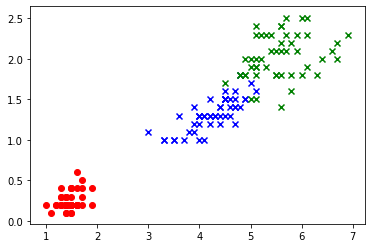

In [64]:
plt.scatter(X_l[y_l==0,0],X_l[y_l==0,1],c='r')
plt.scatter(X_l[y_l==1,0],X_l[y_l==1,1],c='b')
plt.scatter(X_l[y_l==2,0],X_l[y_l==2,1],c='g')
plt.scatter(X_r[y_r==0,0],X_r[y_r==0,1],c='r',marker='x')
plt.scatter(X_r[y_r==1,0],X_r[y_r==1,1],c='b',marker='x')
plt.scatter(X_r[y_r==2,0],X_r[y_r==2,1],c='g',marker='x')
plt.show()

In [68]:
entropy_val,d,v = try_split(X,y)
X_l,X_r,y_l,y_r = split(X,y,d,v)
print(str(entropy(y_l)))
print(str(entropy(y_r)))

0
0.6931471805599453


In [69]:
try_split(X_r,y_r)

(0.4132278899361904, 1, 1.75)

In [71]:
X_r_l,X_r_r,y_r_l,y_r_r = split(X_r,y_r,1,1.75)

In [72]:
entropy(y_r_l)

0.30849545083110386

In [73]:
entropy(y_r_r)

0.10473243910508653